In [ ]:
!pip install scikit-fuzzy > /dev/null 2>&1

19.847607361963192


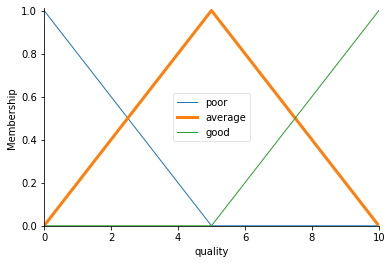

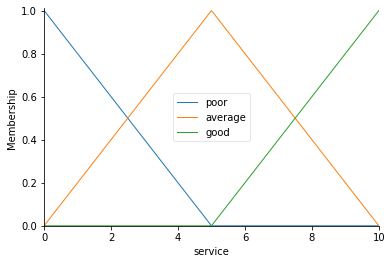

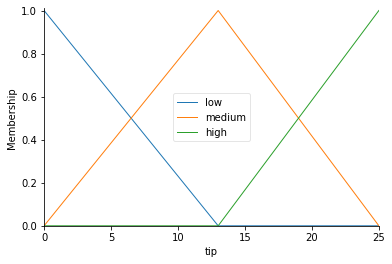

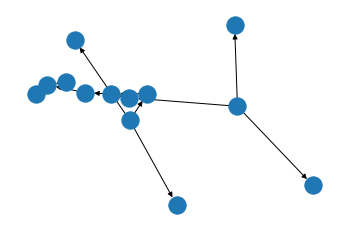

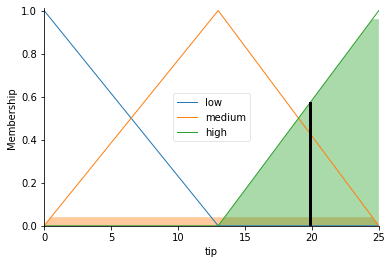

In [ ]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

# New Antecedent/Consequent objects hold universe variables and membership
# functions
quality = ctrl.Antecedent(np.arange(0, 11, 1), 'quality')
service = ctrl.Antecedent(np.arange(0, 11, 1), 'service')
tip = ctrl.Consequent(np.arange(0, 26, 1), 'tip')

# Auto-membership function population is possible with .automf(3, 5, or 7)
quality.automf(3)
service.automf(3)

# Custom membership functions can be built interactively with a familiar,
# Pythonic API
tip['low'] = fuzz.trimf(tip.universe, [0, 0, 13])
tip['medium'] = fuzz.trimf(tip.universe, [0, 13, 25])
tip['high'] = fuzz.trimf(tip.universe, [13, 25, 25])

"""
To help understand what the membership looks like, use the ``view`` methods.
These return the matplotlib `Figure` and `Axis` objects. They are persistent
as written in Jupyter notebooks; other environments may require a `plt.show()`
command after each `.view()`.
"""

# You can see how these look with .view()
quality['average'].view()
"""
.. image:: PLOT2RST.current_figure
"""
service.view()
"""
.. image:: PLOT2RST.current_figure
"""
tip.view()
"""
.. image:: PLOT2RST.current_figure
Fuzzy rules
-----------
Now, to make these triangles useful, we define the *fuzzy relationship*
between input and output variables. For the purposes of our example, consider
three simple rules:
1. If the food is poor OR the service is poor, then the tip will be low
2. If the service is average, then the tip will be medium
3. If the food is good OR the service is good, then the tip will be high.
Most people would agree on these rules, but the rules are fuzzy. Mapping the
imprecise rules into a defined, actionable tip is a challenge. This is the
kind of task at which fuzzy logic excels.
"""

rule1 = ctrl.Rule(quality['poor'] | service['poor'], tip['low'])
rule2 = ctrl.Rule(service['average'], tip['medium'])
rule3 = ctrl.Rule(service['good'] | quality['good'], tip['high'])

rule1.view()

"""
.. image:: PLOT2RST.current_figure
Control System Creation and Simulation
---------------------------------------
Now that we have our rules defined, we can simply create a control system
via:
"""

tipping_ctrl = ctrl.ControlSystem([rule1, rule2, rule3])

"""
In order to simulate this control system, we will create a
``ControlSystemSimulation``.  Think of this object representing our controller
applied to a specific set of circumstances.  For tipping, this might be tipping
Sharon at the local brew-pub.  We would create another
``ControlSystemSimulation`` when we're trying to apply our ``tipping_ctrl``
for Travis at the cafe because the inputs would be different.
"""

tipping = ctrl.ControlSystemSimulation(tipping_ctrl)

"""
We can now simulate our control system by simply specifying the inputs
and calling the ``compute`` method.  Suppose we rated the quality 6.5 out of 10
and the service 9.8 of 10.
"""
# Pass inputs to the ControlSystem using Antecedent labels with Pythonic API
# Note: if you like passing many inputs all at once, use .inputs(dict_of_data)
tipping.input['quality'] = 6.5
tipping.input['service'] = 9.8

# Crunch the numbers
tipping.compute()

"""
Once computed, we can view the result as well as visualize it.
"""
print(tipping.output['tip'])
tip.view(sim=tipping)
